In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/ettore1461/anaconda3/envs/sheep/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ettore1461/anaconda3/envs/sheep/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ettore1461/anaconda3/envs/sheep/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Analisi Temporale della difficoltà

In [12]:
from datetime import datetime

In [2]:
path_file="/home/ettore1461/Scrivania/Dati Cesare/difficulty.csv"
Dati=pd.read_csv(path_file,names=["Data","Value"])

In [18]:
str2date=lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S")
Dati.Data=Dati.Data.apply(str2date)

In [19]:
Dati.head()

,Data,Value
0,2017-04-17,5.208087e+11
1,2017-04-18,5.208087e+11
2,2017-04-19,5.208087e+11
3,2017-04-20,5.208087e+11
4,2017-04-21,5.208087e+11


In [23]:
from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [24]:
# Create a figure with x_axis_type="datetime": p
p = figure(x_axis_type="datetime", x_axis_label='Date', y_axis_label='Difficult')
source=ColumnDataSource(Dati)
p.line(source=source,x="Data",y="Value")
show(p)

In [26]:
from math import log
Dati["logValue"]=Dati.Value.apply(log)

In [123]:
p = figure(x_axis_type="datetime", x_axis_label='Date', y_axis_label='log(Difficult)')
source=ColumnDataSource(Dati)
p.line(source=source,x="Data",y="logValue")
show(p)

(array([   1.,    1.,    0.,    1.,    1.,    3.,  316.,    4.,    4.,
           4.,    5.,    2.,    4.,    3.,    2.,    1.,    2.,    3.,
           1.,    0.,    3.,    0.,    0.,    1.,    0.,    1.,    0.,
           0.,    0.,    1.]),
 array([-0.04229439, -0.03543658, -0.02857878, -0.02172098, -0.01486318,
        -0.00800537, -0.00114757,  0.00571023,  0.01256803,  0.01942584,
         0.02628364,  0.03314144,  0.03999925,  0.04685705,  0.05371485,
         0.06057265,  0.06743046,  0.07428826,  0.08114606,  0.08800386,
         0.09486167,  0.10171947,  0.10857727,  0.11543507,  0.12229288,
         0.12915068,  0.13600848,  0.14286628,  0.14972409,  0.15658189,
         0.16343969]),
 <a list of 30 Patch objects>)

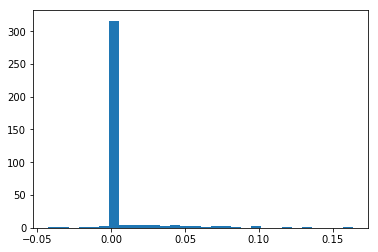

In [31]:
plt.hist(np.diff(Dati.logValue), bins=30)

In [39]:
pd.DataFrame({"Diff_LogValue":np.diff(Dati.logValue)}).describe()

,Diff_LogValue
count,364.000000
mean,0.005488
std,0.020548
min,-0.042294
25%,0.000000
50%,0.000000
75%,0.000000
max,0.163440


In [50]:
days20= lambda x: (x-Dati.Data.min()).days
Dati["Days_from_start"]=Dati.Data.apply(days20)

In [124]:
p = figure(x_axis_label='Date from start', y_axis_label='log(Difficult)')
source=ColumnDataSource(Dati)
p.line(source=source,x="Days_from_start",y="logValue")
show(p)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr=LinearRegression()

In [76]:
X=Dati.Days_from_start.values.reshape(-1,1)
Y=Dati.logValue.values.reshape(-1,1)
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
Dati["Linear_Pred"]=lr.predict(X)

In [125]:
p = figure(x_axis_label='Date from start', y_axis_label='log(Difficult)')
source=ColumnDataSource(Dati)
p.line(source=source,x="Days_from_start",y="logValue")
p.circle(source=source,x="Days_from_start",y="Linear_Pred",color="red",alpha=0.3,size=1)
show(p)

In [91]:
import statsmodels.api as sm

In [112]:
intercept=np.ones(X.shape)
mod=sm.OLS(Y,np.hstack((X**2,X,intercept)))

In [114]:
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.613e+04
Date:                Tue, 17 Apr 2018   Prob (F-statistic):               0.00
Time:                        23:54:17   Log-Likelihood:                 485.70
No. Observations:                 365   AIC:                            -965.4
Df Residuals:                     362   BIC:                            -953.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.756e-06   3.38e-07     17.003      0.000    5.09e-06    6.42e-06
x2             0.0036      0.000     28.362      0.000       0.003       0.004
const         26.9706      0.010   2689.335      0.000      26.951      26.990
==============================================================================
Omnibus:                        6.301   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.421
Skew:                          -0.306   Prob(JB):                       0.0403
Kurtosis:                       2.784   Cond. No.                     1.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

L'equazione è:

$\ln(Diff)=26.97+(5.756*10^{-6})t^2+0.0036t$

In [145]:
Dati["Pred_mod1"]=res.predict(np.hstack((X**2,X,intercept)))

In [146]:
p = figure(x_axis_label='Date from start', y_axis_label='log(Difficult)')
source=ColumnDataSource(Dati)
p.line(source=source,x="Days_from_start",y="logValue")
p.circle(source=source,x="Days_from_start",y="Pred_mod1",color="red",alpha=0.3,size=1)
show(p)

# Analisi con l'Hash-Rate

In [127]:
path_file2="/home/ettore1461/Scrivania/Dati Cesare/hash-rate.csv"
temp=pd.read_csv(path_file2,names=["Data","Value"])

In [132]:
Dati["HashRate"]=temp.Value

In [133]:
p = figure(x_axis_type="datetime", x_axis_label='Date', y_axis_label='Difficult')
source=ColumnDataSource(Dati)
p.line(source=source,x="Data",y="HashRate")
show(p)

In [134]:
Dati["log_HashRate"]=Dati.HashRate.apply(log)

In [135]:
p = figure(x_axis_type="datetime", x_axis_label='Date', y_axis_label='Difficult')
source=ColumnDataSource(Dati)
p.line(source=source,x="Data",y="log_HashRate")
show(p)

In [136]:
X2=Dati.log_HashRate.values.reshape(-1,1)

In [140]:
mod2=sm.OLS(Y,np.hstack((X,X2,X2**2,intercept)))

In [141]:
res2=mod2.fit()

In [142]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.198e+04
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        00:11:54   Log-Likelihood:                 505.68
No. Observations:                 365   AIC:                            -1003.
Df Residuals:                     361   BIC:                            -987.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0048      0.000     34.946      0.000       0.005       0.005
x2            -4.8498      0.324    -14.950      0.000      -5.488      -4.212
x3             0.1548      0.010     15.738      0.000       0.135       0.174
const         64.9059      2.673     24.285      0.000      59.650      70.162
==============================================================================
Omnibus:                        1.368   Durbin-Watson:                   0.357
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                1.344
Skew:                          -0.148   Prob(JB):                        0.511
Kurtosis:                       2.967   Cond. No.                     2.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

L'equazione è:

$ \ln(Diff)=64.5+0.0048t-4.8498HashRate_t+0.1548(HashRate_t)^2$

In [144]:
Dati["Pred_mod2"]=res2.predict(np.hstack((X,X2,X2**2,intercept)))

In [156]:
p = figure(x_axis_label='Date from start', y_axis_label='log(Difficult)')
source=ColumnDataSource(Dati)
p.line(source=source,x="Days_from_start",y="logValue")
p.circle(source=source,x="Days_from_start",y="Pred_mod1",color="red",alpha=0.6,size=1.5,legend="Model1")
p.circle(source=source,x="Days_from_start",y="Pred_mod2",color="blue",alpha=0.6,size=2,legend="Model2")
show(p)